In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pandasql
import scipy

In [3]:
pwd

'C:\\Users\\james\\Desktop\\SpringboardWork'

In [4]:
cd Relax\relax_challenge

C:\Users\james\Desktop\SpringboardWork\Relax\relax_challenge


In [5]:
# read csv
df = pd.read_csv('takehome_user_engagement.csv')

In [6]:
df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [7]:
df.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [8]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

In [9]:
df['tp7'] = df['time_stamp'] + pd.DateOffset(days=7)

In [10]:
df.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
tp7           datetime64[ns]
dtype: object

In [11]:
df

,time_stamp,user_id,visited,tp7
0,2014-04-22 03:53:30,1,1,2014-04-29 03:53:30
1,2013-11-15 03:45:04,2,1,2013-11-22 03:45:04
2,2013-11-29 03:45:04,2,1,2013-12-06 03:45:04
3,2013-12-09 03:45:04,2,1,2013-12-16 03:45:04
4,2013-12-25 03:45:04,2,1,2014-01-01 03:45:04
...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,2013-09-13 06:14:15
207913,2013-01-15 18:28:37,11997,1,2013-01-22 18:28:37
207914,2014-04-27 12:45:16,11998,1,2014-05-04 12:45:16
207915,2012-06-02 11:55:59,11999,1,2012-06-09 11:55:59


In [12]:
dfu = pd.read_csv('takehome_users.csv', encoding="ISO-8859-1")

In [13]:
dfu.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [14]:
dfu.shape

(12000, 10)

In [15]:
dfu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [16]:
dfu.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [17]:
dfu.creation_source.unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [18]:
df2 = df
df2

,time_stamp,user_id,visited,tp7
0,2014-04-22 03:53:30,1,1,2014-04-29 03:53:30
1,2013-11-15 03:45:04,2,1,2013-11-22 03:45:04
2,2013-11-29 03:45:04,2,1,2013-12-06 03:45:04
3,2013-12-09 03:45:04,2,1,2013-12-16 03:45:04
4,2013-12-25 03:45:04,2,1,2014-01-01 03:45:04
...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,2013-09-13 06:14:15
207913,2013-01-15 18:28:37,11997,1,2013-01-22 18:28:37
207914,2014-04-27 12:45:16,11998,1,2014-05-04 12:45:16
207915,2012-06-02 11:55:59,11999,1,2012-06-09 11:55:59


In [19]:
# see how many options there are for org_id
dfu.org_id.unique()

array([ 11,   1,  94, 193, 197,  37,  74, 302, 318,  69, 130, 254,   0,
       175, 211,   2,  58,  54,   7,   6, 123,  81,  56, 134,  92, 251,
       283,  98, 401,  33,  59, 109, 276, 208, 332,  64, 235,  63,  14,
         4, 127,  32, 224, 304,  61,  51, 229,  88, 325, 150, 347, 203,
        21, 409, 215, 141,   5, 107, 184, 310, 367, 389,  89, 242,  68,
        16,  49, 185,  91, 172,   8,  43, 249,  26, 139,  70,  10, 252,
        53, 119,   3, 196, 335, 375, 303, 307,  25, 370,  83,  27, 306,
       118, 295,  19, 301, 100, 112, 263,  39,  12,  86, 402,  42, 103,
       373, 268,  30, 406,  48, 313,   9, 138, 261,  35, 264,  95,  55,
        60, 234,  28, 410, 170, 374,  15,  17, 364,  62, 244, 342, 225,
       121, 255, 411, 217, 165, 415, 104, 329, 278, 116, 151, 290, 200,
       187, 122, 353, 135, 328,  36,  13, 341, 349, 198, 153, 108,  77,
       142, 275, 176,  87, 191, 102, 245, 154, 218, 385,  76, 321, 159,
       371,  50,  75, 333, 137, 292, 286, 131, 178, 213, 376, 36

In [20]:
df2 = df2.sort_values(by=['user_id','time_stamp'])
df2

,time_stamp,user_id,visited,tp7
0,2014-04-22 03:53:30,1,1,2014-04-29 03:53:30
1,2013-11-15 03:45:04,2,1,2013-11-22 03:45:04
2,2013-11-29 03:45:04,2,1,2013-12-06 03:45:04
3,2013-12-09 03:45:04,2,1,2013-12-16 03:45:04
4,2013-12-25 03:45:04,2,1,2014-01-01 03:45:04
...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,2013-09-13 06:14:15
207913,2013-01-15 18:28:37,11997,1,2013-01-22 18:28:37
207914,2014-04-27 12:45:16,11998,1,2014-05-04 12:45:16
207915,2012-06-02 11:55:59,11999,1,2012-06-09 11:55:59


In [21]:
#from pandasql import sqldf
#pysqldf = lambda q: sqldf(q, globals())

In [22]:
#print( pysqldf("SELECT df.user_id, df.time_stamp, df.tp7 FROM df LEFT JOIN df2 ON df.user_id = df2.user_id;"))
#print(pysqldf("SELECT df.user_id, df.time_stamp, COUNT(t2.user_id) FROM df LEFT JOIN df2 ON df.user_id = df2.user_id WHERE df2.time_stamp < df.tp7 AND df2.time_stamp > df.time_stamp"))

In [23]:
df3 = df.merge(df2, how='left', on='user_id')


In [24]:
df3['w7'] = (df3['tp7_x'] > df3['time_stamp_y']) & (df3['time_stamp_x'] < df3['time_stamp_y'])

In [25]:
df3['w7'].sum()

703049

In [26]:
df3[df3['w7']==True]

,time_stamp_x,user_id,visited_x,tp7_x,time_stamp_y,visited_y,tp7_y,w7
47,2013-12-25 03:45:04,2,1,2014-01-01 03:45:04,2013-12-31 03:45:04,1,2014-01-07 03:45:04,True
92,2014-02-03 03:45:04,2,1,2014-02-10 03:45:04,2014-02-08 03:45:04,1,2014-02-15 03:45:04,True
93,2014-02-03 03:45:04,2,1,2014-02-10 03:45:04,2014-02-09 03:45:04,1,2014-02-16 03:45:04,True
107,2014-02-08 03:45:04,2,1,2014-02-15 03:45:04,2014-02-09 03:45:04,1,2014-02-16 03:45:04,True
108,2014-02-08 03:45:04,2,1,2014-02-15 03:45:04,2014-02-13 03:45:04,1,2014-02-20 03:45:04,True
...,...,...,...,...,...,...,...,...
53193343,2014-05-26 11:04:47,11988,1,2014-06-02 11:04:47,2014-05-27 11:04:47,1,2014-06-03 11:04:47,True
53193344,2014-05-26 11:04:47,11988,1,2014-06-02 11:04:47,2014-06-01 11:04:47,1,2014-06-08 11:04:47,True
53193374,2014-05-27 11:04:47,11988,1,2014-06-03 11:04:47,2014-06-01 11:04:47,1,2014-06-08 11:04:47,True
53193408,2014-04-20 14:22:45,11991,1,2014-04-27 14:22:45,2014-04-25 14:22:45,1,2014-05-02 14:22:45,True


In [27]:
df3_piv = df3.pivot_table(values='w7', index=['user_id','time_stamp_x'], aggfunc='sum')

In [28]:
df3_piv = df3_piv.reset_index()
df3_piv

,user_id,time_stamp_x,w7
0,1,2014-04-22 03:53:30,0.0
1,2,2013-11-15 03:45:04,0.0
2,2,2013-11-29 03:45:04,0.0
3,2,2013-12-09 03:45:04,0.0
4,2,2013-12-25 03:45:04,1.0
...,...,...,...
207912,11996,2013-09-06 06:14:15,0.0
207913,11997,2013-01-15 18:28:37,0.0
207914,11998,2014-04-27 12:45:16,0.0
207915,11999,2012-06-02 11:55:59,0.0


In [29]:
df4 = df3_piv.pivot_table(values='w7', index='user_id', aggfunc= 'max')
df4['Adopted_User'] = df4['w7'].apply(lambda x: 1 if x >=3 else 0)
df4

,w7,Adopted_User
user_id,,
1,0.0,0
2,2.0,0
3,0.0,0
4,0.0,0
5,0.0,0
...,...,...
11996,0.0,0
11997,0.0,0
11998,0.0,0


In [30]:
df5 = df4[df4['Adopted_User']==1]
df5

,w7,Adopted_User
user_id,,
10,6.0,1
42,6.0,1
43,3.0,1
53,3.0,1
63,6.0,1
...,...,...
11965,3.0,1
11967,6.0,1
11969,6.0,1


In [31]:
pwd

'C:\\Users\\james\\Desktop\\SpringboardWork\\Relax\\relax_challenge'

In [32]:
df5 = df5.reset_index()

In [33]:
dff = dfu.merge(df5, how='left', left_on='object_id', right_on='user_id')

In [34]:
dff[dff['Adopted_User']==1]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,w7,Adopted_User
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,10.0,6.0,1.0
41,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN,42.0,6.0,1.0
42,43,2012-12-31 07:13:17,Gomes Beatrice,vgqmpljq@yyyxt.com,GUEST_INVITE,1.366010e+09,0,0,63,149.0,43.0,3.0,1.0
52,53,2013-02-09 23:47:15,Ribeiro Camila,CamilaGomesRibeiro@gmail.com,GUEST_INVITE,1.367798e+09,0,0,37,3641.0,53.0,3.0,1.0
62,63,2012-12-20 16:30:52,Martins Leonor,LeonorAraujoMartins@gmail.com,SIGNUP_GOOGLE_AUTH,1.401899e+09,0,0,203,NaN,63.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,11965,2014-04-25 07:17:35,Storey Lewis,LewisStorey@cuvox.de,GUEST_INVITE,1.400657e+09,0,0,65,11251.0,11965.0,3.0,1.0
11966,11967,2014-01-12 08:12:37,Barbosa Pedro,PedroFernandesBarbosa@gmail.com,GUEST_INVITE,1.401524e+09,0,0,15,5688.0,11967.0,6.0,1.0
11968,11969,2013-06-01 00:48:14,Dickinson Aidan,AidanDickinson@hotmail.com,GUEST_INVITE,1.401411e+09,1,1,52,6647.0,11969.0,6.0,1.0
11974,11975,2013-03-23 11:10:11,Daecher Jürgen,JurgenDaecher@gustr.com,GUEST_INVITE,1.400757e+09,1,0,31,6410.0,11975.0,6.0,1.0


In [35]:
dff['Adopted_User'] = dff['Adopted_User'].fillna(0)

In [36]:
contigency= pd.crosstab(dff['creation_source'], dff['Adopted_User']) 
contigency

Adopted_User,0.0,1.0
creation_source,,
GUEST_INVITE,1867,296
ORG_INVITE,3809,445
PERSONAL_PROJECTS,1984,127
SIGNUP,1841,246
SIGNUP_GOOGLE_AUTH,1202,183


In [37]:
contigency_pct = pd.crosstab(dff['creation_source'], dff['Adopted_User'], normalize='index')
contigency_pct

Adopted_User,0.0,1.0
creation_source,,
GUEST_INVITE,0.863153,0.136847
ORG_INVITE,0.895393,0.104607
PERSONAL_PROJECTS,0.939839,0.060161
SIGNUP,0.882127,0.117873
SIGNUP_GOOGLE_AUTH,0.867870,0.132130


In [38]:
# Chi-square test of independence. 
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value
print(p)

1.9498477911391087e-16


In [39]:
contigency_pct2 = pd.crosstab(dff['Adopted_User'], dff['creation_source'], normalize='index')
contigency_pct2

creation_source,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
Adopted_User,,,,,
0.0,0.174437,0.355882,0.185369,0.172008,0.112305
1.0,0.228219,0.343099,0.097918,0.189668,0.141095


In [40]:
contigency2 = pd.crosstab(dff['Adopted_User'], dff['creation_source'])
contigency2

creation_source,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
Adopted_User,,,,,
0.0,1867,3809,1984,1841,1202
1.0,296,445,127,246,183


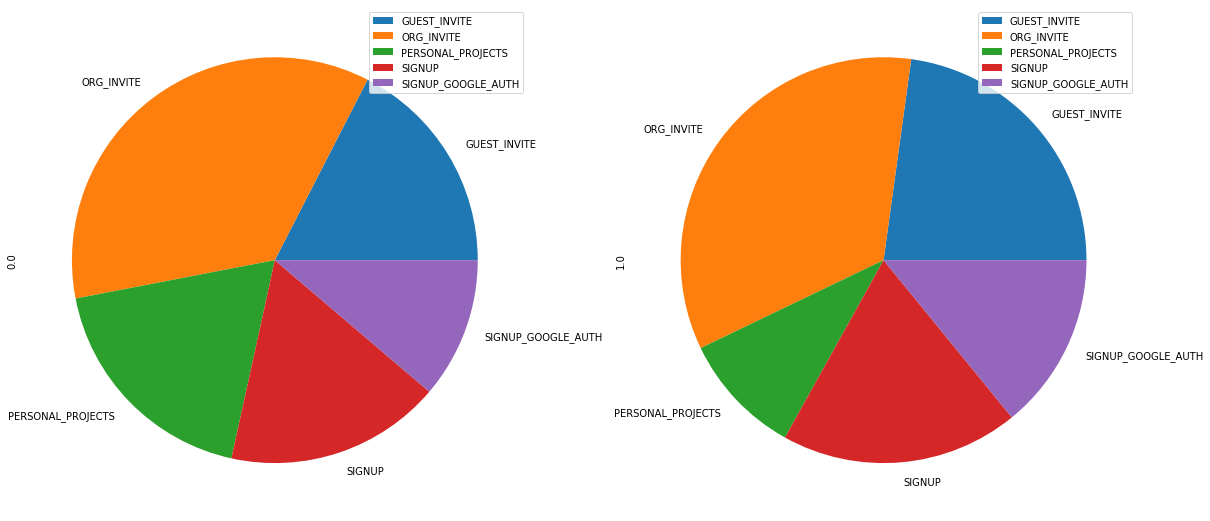

In [41]:
pd.crosstab(dff.creation_source, dff.Adopted_User).plot(kind='pie', subplots=True, figsize=(20, 15))
plt.show()

In [42]:
c, p, dof, expected = chi2_contingency(contigency2) 
# Print the p-value
print(p)

1.9498477911391087e-16


In [43]:
np.sum(dff['Adopted_User'][dff['creation_source']=='GUEST_INVITE'])

296.0

In [44]:
#chi square for opted in to mailing list
contingency_optin = pd.crosstab(dff.opted_in_to_mailing_list, dff.Adopted_User)
contingency_optin


Adopted_User,0.0,1.0
opted_in_to_mailing_list,,
0,8048,958
1,2655,339


In [45]:
c, p, dof, expected = chi2_contingency(contingency_optin) 
# Print the p-value
print(p)

0.3114051552854165


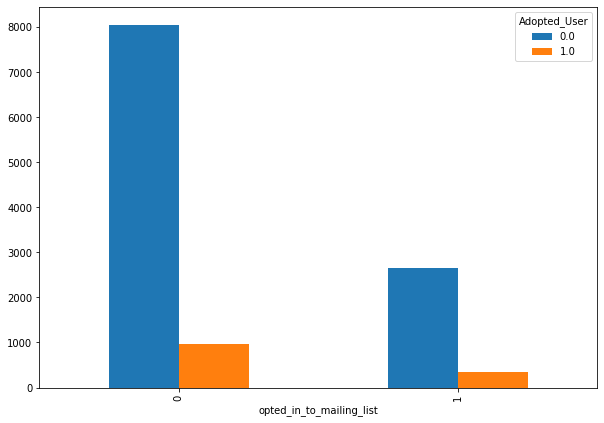

In [46]:
pd.crosstab(dff.opted_in_to_mailing_list, dff.Adopted_User).plot(kind='bar', figsize=(10, 7))

In [47]:
#chi square for enabled for marketing drip
contingency_emd = pd.crosstab(dff.enabled_for_marketing_drip, dff.Adopted_User)
contingency_emd

Adopted_User,0.0,1.0
enabled_for_marketing_drip,,
0,9108,1100
1,1595,197


In [48]:
c, p, dof, expected = chi2_contingency(contingency_emd) 
# Print the p-value
print(p)

0.8163932499552791


In [49]:
print('the percentage of opt ins among Adopted Users: {}'.format(np.sum(dff.opted_in_to_mailing_list[dff['Adopted_User']==1])/len(dff[dff['Adopted_User']==1])))
print('the percentage of opt ins among Non Adopted Users: {}'.format(np.sum(dff.opted_in_to_mailing_list[dff['Adopted_User']==0])/len(dff[dff['Adopted_User']==0])))

the percentage of opt ins among Adopted Users: 0.26137239784117194
the percentage of opt ins among Non Adopted Users: 0.24806129122675885


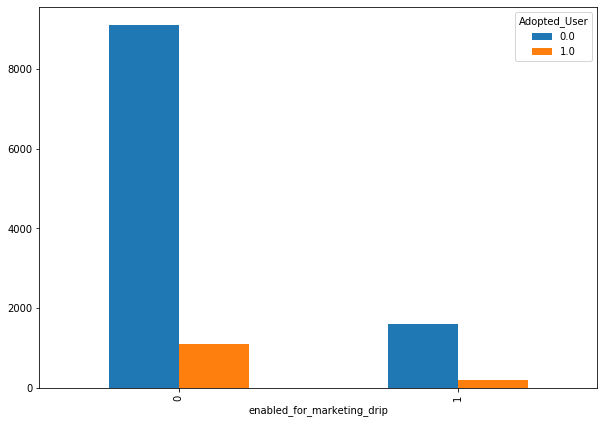

In [50]:
pd.crosstab(dff.enabled_for_marketing_drip, dff.Adopted_User).plot(kind='bar', figsize=(10, 7))

In [51]:
#I'm going to select the features that I think will be significant, dropping org_id and the specific id of the person inviting
# I will one hot encode the the creation source
dfs = dff[['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip']]
dfs = pd.get_dummies(dfs, drop_first=True)

In [52]:
dfs

,opted_in_to_mailing_list,enabled_for_marketing_drip,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
11995,0,0,1,0,0,0
11996,0,0,0,0,0,1
11997,1,1,0,0,0,0
11998,0,0,0,1,0,0


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

In [54]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(dfs, dff['Adopted_User'])

In [55]:
np.sum(y_test)

322.0

In [56]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred_rfc = clf.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2678
         1.0       0.00      0.00      0.00       322

    accuracy                           0.89      3000
   macro avg       0.45      0.50      0.47      3000
weighted avg       0.80      0.89      0.84      3000



C:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
print(confusion_matrix(y_test, y_pred_rfc))

[[2678    0]
 [ 322    0]]


In [58]:
logreg = LogisticRegression()

In [59]:
model = logreg.fit(X_train, y_train)

In [60]:
y_pred = model.predict(X_test)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2678
         1.0       0.00      0.00      0.00       322

    accuracy                           0.89      3000
   macro avg       0.45      0.50      0.47      3000
weighted avg       0.80      0.89      0.84      3000



C:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
print(confusion_matrix(y_test, y_pred))

[[2678    0]
 [ 322    0]]


In [63]:
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks

In [64]:
X = dfs
y = dff[['Adopted_User']]

In [65]:
ros = RandomUnderSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

AttributeError: 'RandomUnderSampler' object has no attribute '_validate_data'

In [ ]:
X, y = make_classification(n_samples = 10000, n_features = 2, n_redundant = 0, n_clusters_per_class = 1, weights=[0.99], flip_y = 0, random_state = 1)

In [ ]:
y

In [ ]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()